In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

from segment_anything import sam_model_registry
from segment_anything import SamAutomaticMaskGenerator, SamPredictor

In [8]:
def show_anns(anns):
    if len(anns) == 0:
        return None
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    # The alpha channel is set to 0, i.e. the image is transparent
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        # Generate a random colol: np.random.random(3) generates a random float for each color channel
        # Transparency 0.35
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    return img

In [3]:
print(sam_model_registry.keys())

dict_keys(['default', 'vit_h', 'vit_l', 'vit_b'])


In [4]:
# Default is vit_h
sam = sam_model_registry['default'](checkpoint="../models/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

In [5]:
print(sam)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [13]:
img = np.array(Image.open('/Users/ericwu/Workspace/lab/images/erdem-01.webp'))

In [7]:
%time masks = mask_generator.generate(img)

CPU times: user 2min 41s, sys: 1min 10s, total: 3min 52s
Wall time: 47.5 s


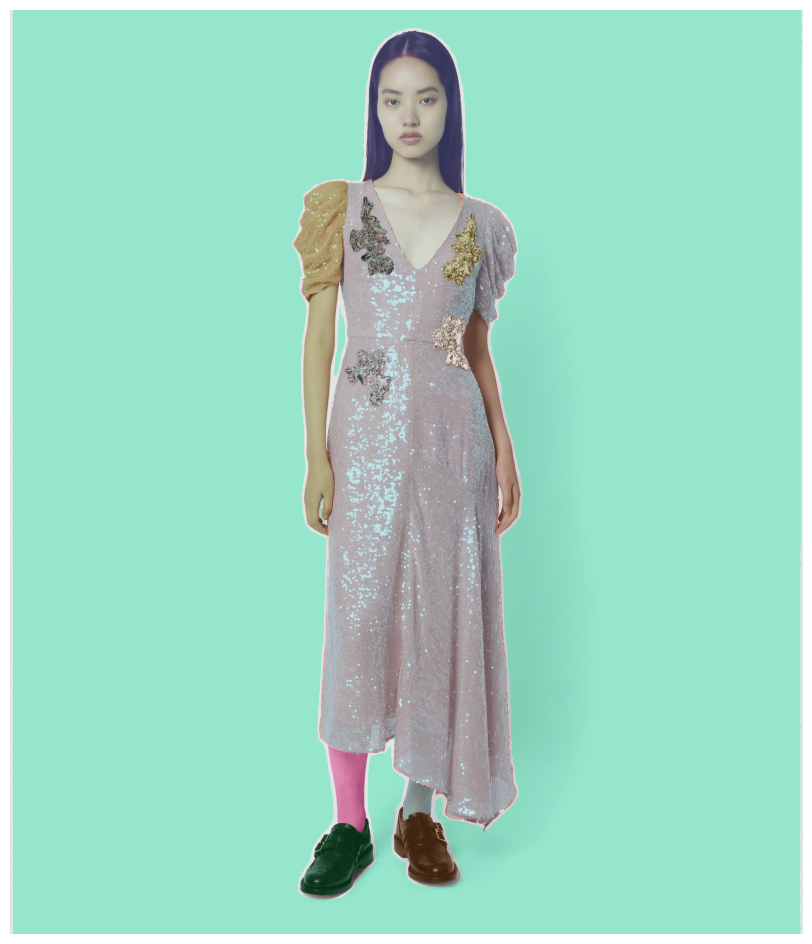

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)
annotated_img = show_anns(masks)
ax.imshow(annotated_img)
ax.axis('off')
plt.show()